### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
# tienda2["precio"].head()
# tienda3.head()
# tienda4.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/tienda_1.csv'

#1. Análisis de facturación



El Ingresos Totales de la tienda 1 es: $ 1150880400.0
El Ingresos Totales de la tienda 2 es: $ 1116343500.0
El Ingresos Totales de la tienda 3 es: $ 1098019600.0
El Ingresos Totales de la tienda 4 es: $ 1038375700.0
---- Quién vende más y qué tienda participa más en el volumen económico. ----


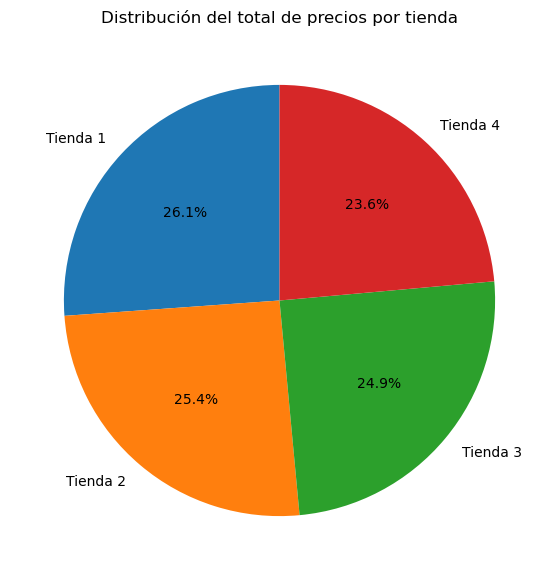

In [5]:
precio_tienda = tienda["Precio"].sum()  
precio_tienda2 = tienda2["Precio"].sum()
tienda3_precio = tienda3["Precio"].sum()
tienda4_precio = tienda4["Precio"].sum()

print("El Ingresos Totales de la tienda 1 es: $", precio_tienda)
print("El Ingresos Totales de la tienda 2 es: $", precio_tienda2)
print("El Ingresos Totales de la tienda 3 es: $", tienda3_precio)
print("El Ingresos Totales de la tienda 4 es: $", tienda4_precio)

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
totales = [precio_tienda, precio_tienda2, tienda3_precio, tienda4_precio]

print("---- Quién vende más y qué tienda participa más en el volumen económico. ----")


plt.figure(figsize=(7,7))
plt.pie(
    totales,
    labels=tiendas,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribución del total de precios por tienda")
plt.show()


# 2. Ventas por categoría

In [6]:
productos_por_categoria = (
    tienda
      .groupby("Categoría del Producto")["Producto"]
      .count()
)


categoria_top = productos_por_categoria.idxmax()   # nombre de la categoría
cantidad_top = productos_por_categoria.max()       # cantidad vendida


print("----Tienda 1----")
print("Categoría más vendida o popular:", categoria_top)
print("Cantidad vendida:", cantidad_top)

print("----")

print(productos_por_categoria)

----Tienda 1----
Categoría más vendida o popular: Muebles
Cantidad vendida: 465
----
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64


In [7]:
productos_por_categoria = (
    tienda2
      .groupby("Categoría del Producto")["Producto"]
      .count()
)


categoria_top = productos_por_categoria.idxmax()   # nombre de la categoría
cantidad_top = productos_por_categoria.max()       # cantidad vendida

# print("Tienda 2:",productos_por_categoria)


print("----Tienda 2----")
print("Categoría más vendida o popular:", categoria_top)
print("Cantidad vendida:", cantidad_top)

print("----")

print(productos_por_categoria)

----Tienda 2----
Categoría más vendida o popular: Muebles
Cantidad vendida: 442
----
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Producto, dtype: int64


In [8]:
productos_por_categoria = (
    tienda3
      .groupby("Categoría del Producto")["Producto"]
      .count()
)

categoria_top = productos_por_categoria.idxmax()   # nombre de la categoría
cantidad_top = productos_por_categoria.max()       # cantidad vendida


print("----Tienda 3----")
print("Categoría más vendida o popular:", categoria_top)
print("Cantidad vendida:", cantidad_top)


print(productos_por_categoria)

----Tienda 3----
Categoría más vendida o popular: Muebles
Cantidad vendida: 499
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
Name: Producto, dtype: int64


In [9]:
productos_por_categoria = (
    tienda4
      .groupby("Categoría del Producto")["Producto"]
      .count()
)


categoria_top = productos_por_categoria.idxmax()   # nombre de la categoría
cantidad_top = productos_por_categoria.max()       # cantidad vendida


print("----Tienda 3----")
print("Categoría más vendida o popular:", categoria_top)
print("Cantidad vendida:", cantidad_top)


print(productos_por_categoria)

----Tienda 3----
Categoría más vendida o popular: Muebles
Cantidad vendida: 480
Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos          254
Electrónicos               451
Instrumentos musicales     170
Juguetes                   338
Libros                     187
Muebles                    480
Name: Producto, dtype: int64


# 3. Calificación promedio de la tienda


In [10]:
tienda  = tienda.assign(Tienda="Tienda 1")
tienda2 = tienda2.assign(Tienda="Tienda 2")
tienda3 = tienda3.assign(Tienda="Tienda 3")
tienda4 = tienda4.assign(Tienda="Tienda 4")

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_total["Calificación"] = pd.to_numeric(df_total["Calificación"], errors="coerce")

promedio_por_tienda = df_total.groupby("Tienda")["Calificación"].mean()

print("----Promedio de satisfaccion por tienda por Tienda----")

print(promedio_por_tienda)



----Promedio de satisfaccion por tienda por Tienda----
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


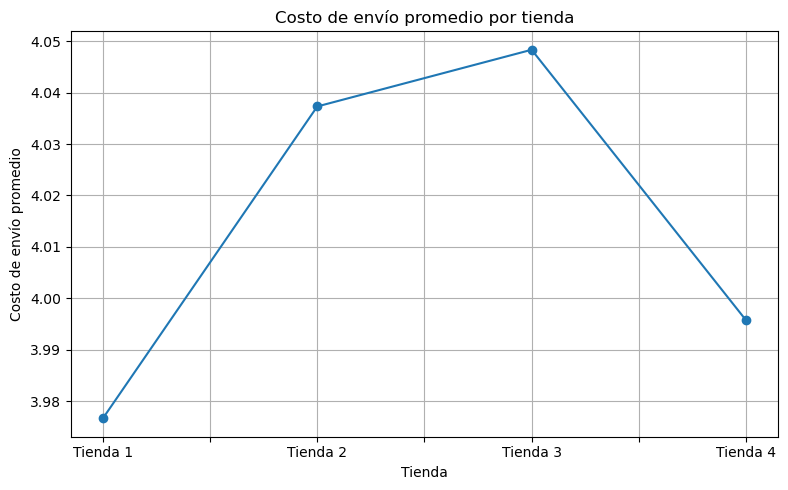

---- La gráfica de líneas muestra el costo de envío promedio por tienda. Se observa cómo varía el gasto de envío entre ellas, identificando qué tienda presenta el costo más alto y cuál el más bajo. Esta comparación permite evaluar qué tan accesible resulta cada tienda en términos de gastos adicionales para el cliente.” ----


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
promedio_por_tienda.plot(kind="line", marker="o")  # marker opcional para ver puntos

plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



print("---- La gráfica de líneas muestra el costo de envío promedio por tienda. Se observa cómo varía el gasto de envío entre ellas, identificando qué tienda presenta el costo más alto y cuál el más bajo. Esta comparación permite evaluar qué tan accesible resulta cada tienda en términos de gastos adicionales para el cliente.” ----")


# 4. Productos más y menos vendidos

In [12]:


# Conteo por categoría
productos_por_categoria = (
    tienda
      .groupby("Categoría del Producto")["Producto"]
      .count()
      .sort_values(ascending=False)
)

# Convertir a tabla
tabla = productos_por_categoria.reset_index()
tabla.columns = ["Categoría", "Cantidad vendida"]

# Valores max y min
max_val = tabla["Cantidad vendida"].max()
min_val = tabla["Cantidad vendida"].min()

# Todas las categorías con max y min (empates)
categorias_mas_vendidas = tabla[tabla["Cantidad vendida"] == max_val]["Categoría"].tolist()
categorias_menos_vendidas = tabla[tabla["Cantidad vendida"] == min_val]["Categoría"].tolist()

print("----Resumen de ventas por categoría en Tienda 1----")
print(tabla)

print("\nRESUMEN:")
print(f"Categoría(s) más vendida(s): {categorias_mas_vendidas} ({max_val})")
print(f"Categoría(s) menos vendida(s): {categorias_menos_vendidas} ({min_val})")


----Resumen de ventas por categoría en Tienda 1----
                 Categoría  Cantidad vendida
0                  Muebles               465
1             Electrónicos               448
2                 Juguetes               324
3        Electrodomésticos               312
4     Deportes y diversión               284
5   Instrumentos musicales               182
6                   Libros               173
7  Artículos para el hogar               171

RESUMEN:
Categoría(s) más vendida(s): ['Muebles'] (465)
Categoría(s) menos vendida(s): ['Artículos para el hogar'] (171)


In [13]:


# Conteo por categoría
productos_por_categoria = (
    tienda2
      .groupby("Categoría del Producto")["Producto"]
      .count()
      .sort_values(ascending=False)
)

# Convertir a tabla
tabla = productos_por_categoria.reset_index()
tabla.columns = ["Categoría", "Cantidad vendida"]

# Valores max y min
max_val = tabla["Cantidad vendida"].max()
min_val = tabla["Cantidad vendida"].min()

# Todas las categorías con max y min (empates)
categorias_mas_vendidas = tabla[tabla["Cantidad vendida"] == max_val]["Categoría"].tolist()
categorias_menos_vendidas = tabla[tabla["Cantidad vendida"] == min_val]["Categoría"].tolist()

print("----Resumen de ventas por categoría en Tienda 2----")
print(tabla)

print("\nRESUMEN:")
print(f"Categoría(s) más vendida(s): {categorias_mas_vendidas} ({max_val})")
print(f"Categoría(s) menos vendida(s): {categorias_menos_vendidas} ({min_val})")


----Resumen de ventas por categoría en Tienda 2----
                 Categoría  Cantidad vendida
0                  Muebles               442
1             Electrónicos               422
2                 Juguetes               313
3        Electrodomésticos               305
4     Deportes y diversión               275
5   Instrumentos musicales               224
6                   Libros               197
7  Artículos para el hogar               181

RESUMEN:
Categoría(s) más vendida(s): ['Muebles'] (442)
Categoría(s) menos vendida(s): ['Artículos para el hogar'] (181)


In [14]:


# Conteo por categoría
productos_por_categoria = (
    tienda3
      .groupby("Categoría del Producto")["Producto"]
      .count()
      .sort_values(ascending=False)
)

# Convertir a tabla
tabla = productos_por_categoria.reset_index()
tabla.columns = ["Categoría", "Cantidad vendida"]

# Valores max y min
max_val = tabla["Cantidad vendida"].max()
min_val = tabla["Cantidad vendida"].min()

# Todas las categorías con max y min (empates)
categorias_mas_vendidas = tabla[tabla["Cantidad vendida"] == max_val]["Categoría"].tolist()
categorias_menos_vendidas = tabla[tabla["Cantidad vendida"] == min_val]["Categoría"].tolist()

print("----Resumen de ventas por categoría en Tienda 3----")
print(tabla)

print("\nRESUMEN:")
print(f"Categoría(s) más vendida(s): {categorias_mas_vendidas} ({max_val})")
print(f"Categoría(s) menos vendida(s): {categorias_menos_vendidas} ({min_val})")


----Resumen de ventas por categoría en Tienda 3----
                 Categoría  Cantidad vendida
0                  Muebles               499
1             Electrónicos               451
2                 Juguetes               315
3        Electrodomésticos               278
4     Deportes y diversión               277
5                   Libros               185
6  Artículos para el hogar               177
7   Instrumentos musicales               177

RESUMEN:
Categoría(s) más vendida(s): ['Muebles'] (499)
Categoría(s) menos vendida(s): ['Artículos para el hogar', 'Instrumentos musicales'] (177)


In [15]:

# Conteo por categoría
productos_por_categoria = (
    tienda4
      .groupby("Categoría del Producto")["Producto"]
      .count()
      .sort_values(ascending=False)
)

# Convertir a tabla
tabla = productos_por_categoria.reset_index()
tabla.columns = ["Categoría", "Cantidad vendida"]

# Valores max y min
max_val = tabla["Cantidad vendida"].max()
min_val = tabla["Cantidad vendida"].min()

# Todas las categorías con max y min (empates)
categorias_mas_vendidas = tabla[tabla["Cantidad vendida"] == max_val]["Categoría"].tolist()
categorias_menos_vendidas = tabla[tabla["Cantidad vendida"] == min_val]["Categoría"].tolist()

print("----Resumen de ventas por categoría en Tienda 4----")
print(tabla)

print("\nRESUMEN:")
print(f"Categoría(s) más vendida(s): {categorias_mas_vendidas} ({max_val})")
print(f"Categoría(s) menos vendida(s): {categorias_menos_vendidas} ({min_val})")


----Resumen de ventas por categoría en Tienda 4----
                 Categoría  Cantidad vendida
0                  Muebles               480
1             Electrónicos               451
2                 Juguetes               338
3     Deportes y diversión               277
4        Electrodomésticos               254
5  Artículos para el hogar               201
6                   Libros               187
7   Instrumentos musicales               170

RESUMEN:
Categoría(s) más vendida(s): ['Muebles'] (480)
Categoría(s) menos vendida(s): ['Instrumentos musicales'] (170)


# 5. Envío promedio por tienda

In [16]:
tienda  = tienda.assign(Tienda="Tienda 1")
tienda2 = tienda2.assign(Tienda="Tienda 2")
tienda3 = tienda3.assign(Tienda="Tienda 3")
tienda4 = tienda4.assign(Tienda="Tienda 4")

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_total["Costo de envío"] = pd.to_numeric(df_total["Costo de envío"], errors="coerce")

promedio_por_tienda = df_total.groupby("Tienda")["Costo de envío"].mean()

print("----Promedio de  costo de envio por tienda ----")

print(promedio_por_tienda)

----Promedio de  costo de envio por tienda ----
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


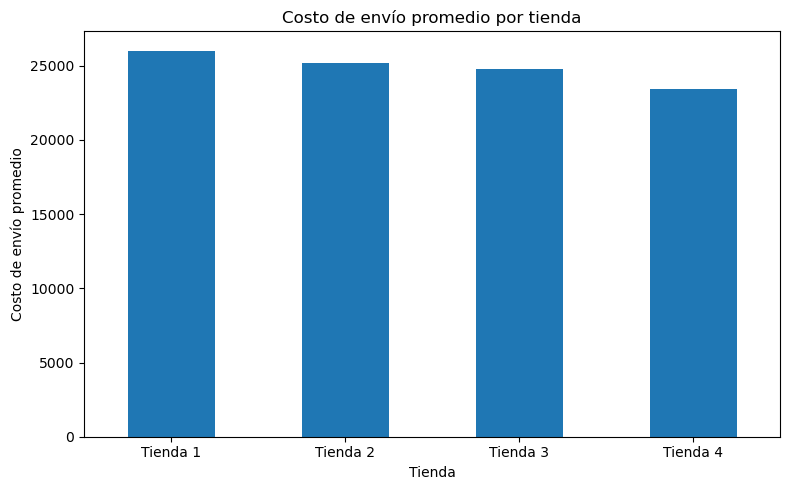

---- “La gráfica de barras ilustra el costo de envío promedio por tienda. Se observa una comparativa clara entre las cuatro tiendas, permitiendo identificar cuál cobra un envío más alto y cuál ofrece el costo más bajo. Esta visualización ayuda a evaluar qué tan accesibles son las tiendas para los clientes en términos de gastos adicionales.” ----


In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
promedio_por_tienda.plot(kind="bar")

plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


print("---- “La gráfica de barras ilustra el costo de envío promedio por tienda. Se observa una comparativa clara entre las cuatro tiendas, permitiendo identificar cuál cobra un envío más alto y cuál ofrece el costo más bajo. Esta visualización ayuda a evaluar qué tan accesibles son las tiendas para los clientes en términos de gastos adicionales.” ----")


---- Columnas de latitud y longitud convertidas a numéricas. ----


        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
4   6.25184 -75.56359


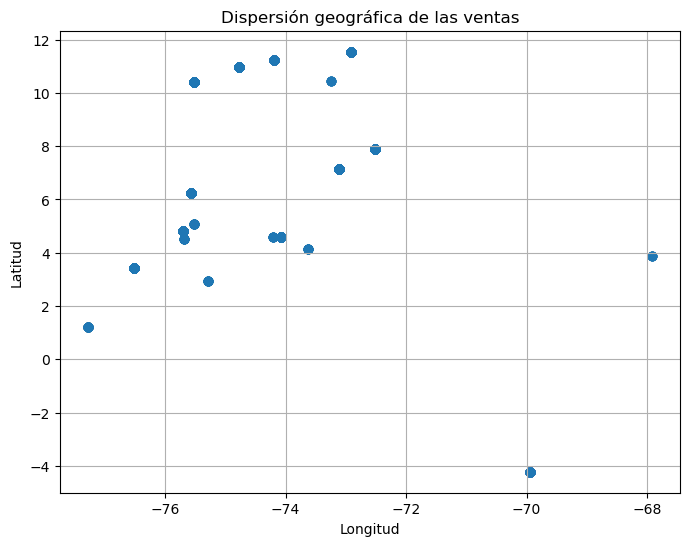

----Zonas con muchos puntos indican alta actividad de ventas.----
----Zonas más vacías indican que pocas ventas ocurren ahí.----


In [18]:
df_total["lat"] = pd.to_numeric(df_total["lat"], errors="coerce")
df_total["lon"] = pd.to_numeric(df_total["lon"], errors="coerce")


print("---- Columnas de latitud y longitud convertidas a numéricas. ----")
print(df_total[["lat", "lon"]].head())
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df_total["lon"], df_total["lat"], alpha=0.5)

plt.title("Dispersión geográfica de las ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


print("----Zonas con muchos puntos indican alta actividad de ventas.----")
print("----Zonas más vacías indican que pocas ventas ocurren ahí.----")



In [22]:
df_total.groupby("Tienda").agg(
    latitudes_validas = ("lat", lambda x: x.notna().sum()),
    longitudes_validas = ("lon", lambda x: x.notna().sum())
)


# df_total[df_total["Tienda"] == "Tienda 1"].head()
# df_total[df_total["Tienda"] == "Tienda 2"].head()
df_total[df_total["Tienda"] == "Tienda 3"].head()
# df_total[df_total["Tienda"] == "Tienda 4"].head()

df_total.groupby("Tienda")[["lat", "lon"]].apply(lambda x: x.notna().sum())

df_total.groupby(["Tienda","lat","lon"]).size().reset_index(name="conteo").head(10)



,Tienda,lat,lon,conteo
0,Tienda 1,-4.21528,-69.94056,32
1,Tienda 1,1.21361,-77.28111,23
2,Tienda 1,2.92730,-75.28189,6
3,Tienda 1,3.43722,-76.52250,283
4,Tienda 1,3.86530,-67.92390,5
5,Tienda 1,4.14200,-73.62664,11
6,Tienda 1,4.53389,-75.68111,14
7,Tienda 1,4.57937,-74.21682,5
8,Tienda 1,4.60971,-74.08175,984
9,Tienda 1,4.81333,-75.69611,133


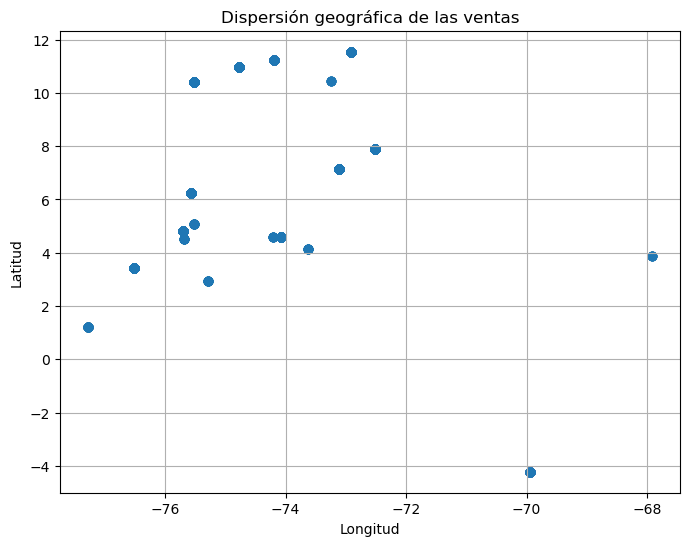

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df_total["lon"], df_total["lat"], alpha=0.5)

plt.title("Dispersión geográfica de las ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()

print("---- Zonas con muchos puntos indican alta actividad de ventas.----")
print("----Zonas más vacías indican que pocas ventas ocurren ahí. ----")


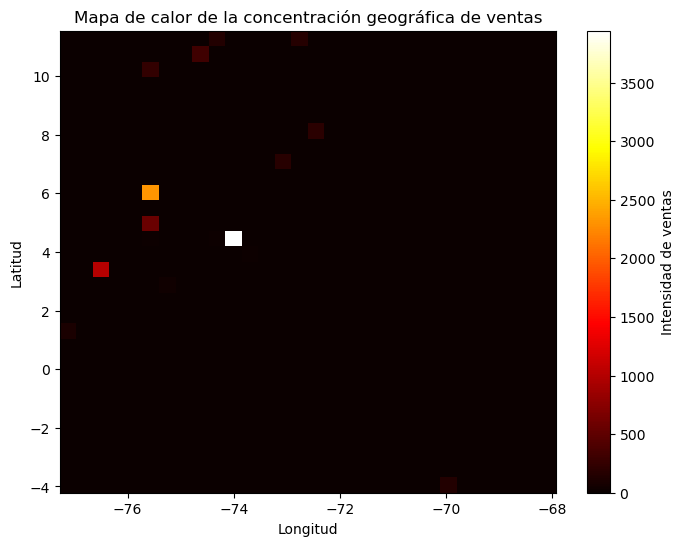

In [25]:
plt.figure(figsize=(8,6))

plt.hist2d(
    df_total["lon"],
    df_total["lat"],
    bins=30,
    cmap="hot"
)

plt.colorbar(label="Intensidad de ventas")
plt.title("Mapa de calor de la concentración geográfica de ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


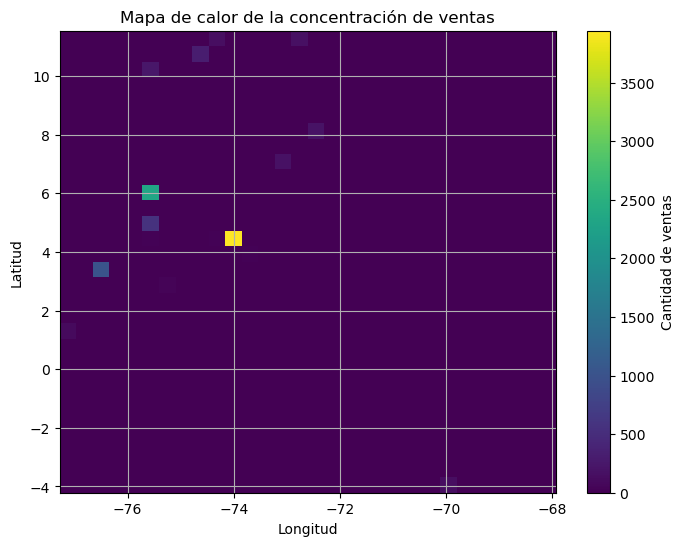

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.hist2d(
    df_total["lon"],
    df_total["lat"],
    bins=30
)

plt.colorbar(label="Cantidad de ventas")
plt.title("Mapa de calor de la concentración de ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


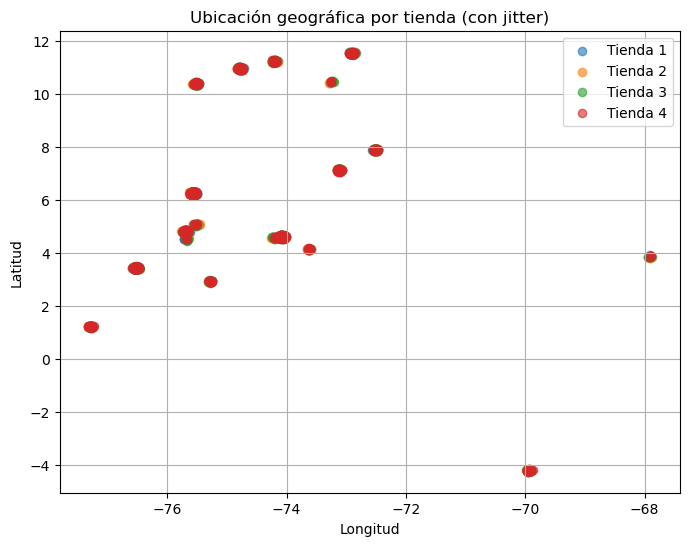

---- La dispersión con 'jitter' ayuda a visualizar mejor la densidad de ventas en áreas específicas, evitando la superposición de puntos. ----


In [24]:
import numpy as np
import matplotlib.pyplot as plt

colores = {
    "Tienda 1": "tab:blue",
    "Tienda 2": "tab:orange",
    "Tienda 3": "tab:green",
    "Tienda 4": "tab:red"
}

markers = {
    "Tienda 1": "o",
    "Tienda 2": "s",
    "Tienda 3": "^",
    "Tienda 4": "D"
}


plt.figure(figsize=(8,6))

for t, datos in df_total.groupby("Tienda"):
    jitter_lon = datos["lon"] + np.random.normal(0, 0.02, len(datos))
    jitter_lat = datos["lat"] + np.random.normal(0, 0.02, len(datos))
    plt.scatter(jitter_lon, jitter_lat, label=t, alpha=0.6)

plt.title("Ubicación geográfica por tienda (con jitter)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(True)
plt.show()

print("---- La dispersión con 'jitter' ayuda a visualizar mejor la densidad de ventas en áreas específicas, evitando la superposición de puntos. ----")
